Best solution: -0.010448834314407796
Best cost: 0.00010917813852994583


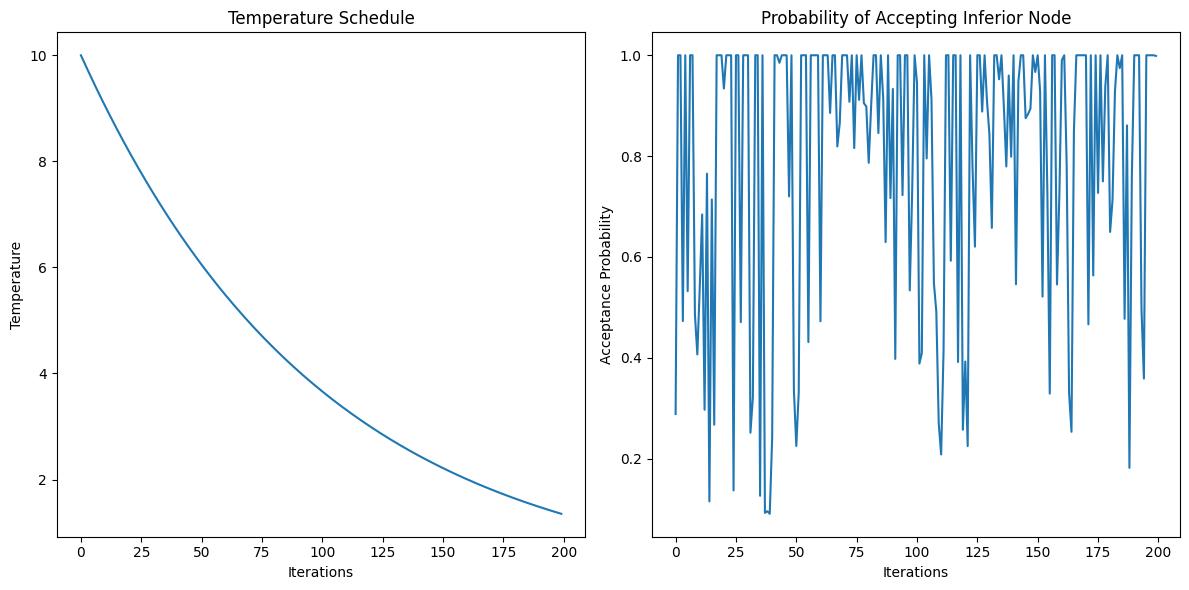

In [6]:
import math
import random
import matplotlib.pyplot as plt

# Objective function: Let's minimize a simple quadratic function f(x) = x^2
def objective_function(x):
    return x ** 2

# Neighboring function: Generate neighboring solutions
def get_neighbor(x):
    # Generate a small change (randomly choose step size)
    return x + random.uniform(-1, 1)

# Acceptance probability function
def acceptance_probability(delta, temperature):
    if delta < 0:
        return 1  # Always accept a better solution
    return math.exp(-delta / temperature)  # Accept worse solution with probability

# Simulated annealing algorithm
def simulated_annealing(initial_solution, initial_temp, cooling_rate, iterations):
    current_solution = initial_solution
    current_temp = initial_temp
    best_solution = current_solution
    best_cost = objective_function(current_solution)

    # To track the temperature and probability of choosing inferior solutions
    temperatures = []
    probabilities = []

    for i in range(iterations):
        # Get a neighbor solution
        neighbor_solution = get_neighbor(current_solution)

        # Calculate the objective function values (cost)
        current_cost = objective_function(current_solution)
        neighbor_cost = objective_function(neighbor_solution)

        # Calculate the energy difference
        delta = neighbor_cost - current_cost

        # Calculate acceptance probability and decide whether to accept the neighbor
        prob = acceptance_probability(delta, current_temp)

        # Accept or reject the new solution based on probability
        if random.random() < prob:
            current_solution = neighbor_solution
            current_cost = neighbor_cost

        # Update the best solution found
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        # Store temperature and probability for plotting
        temperatures.append(current_temp)
        probabilities.append(prob)

        # Decrease the temperature according to the cooling schedule
        current_temp *= cooling_rate

    return best_solution, best_cost, temperatures, probabilities

# Parameters
initial_solution = 10  # Starting solution (arbitrary value)
initial_temp = 10      # Initial temperature
cooling_rate = 0.99    # Cooling rate (decrease temperature)
iterations = 200       # Number of iterations

# Run the simulated annealing
best_solution, best_cost, temperatures, probabilities = simulated_annealing(
    initial_solution, initial_temp, cooling_rate, iterations)

# Output the results
print(f"Best solution: {best_solution}")
print(f"Best cost: {best_cost}")

# Plotting the effect of temperature and probability of accepting an inferior node
plt.figure(figsize=(12, 6))

# Plot temperature vs iterations
plt.subplot(1, 2, 1)
plt.plot(temperatures)
plt.title("Temperature Schedule")
plt.xlabel("Iterations")
plt.ylabel("Temperature")

# Plot probability of accepting inferior node vs iterations
plt.subplot(1, 2, 2)
plt.plot(probabilities)
plt.title("Probability of Accepting Inferior Node")
plt.xlabel("Iterations")
plt.ylabel("Acceptance Probability")

plt.tight_layout()
plt.show()
